you can find chanMap on Google drive (see here "https://github.com/kampff-lab/sc.io/tree/master/Paired%20Recordings")

https://spikeinterface.github.io/blog/marques-smith-neuropixel-384ch-paired-recording/

In [38]:
import scipy
import numpy as np
from matplotlib import pyplot as plt
import spikeinterface as si
import spikeinterface.extractors as se

chanMap_file = "/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/raw/vivo_rat_cortex_marques/chanMap.mat"

RAW_FILE = "/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/raw/vivo_rat_cortex_marques/c26/c26_npx_raw-001.bin"

WIRED_PATH = "/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/4_preprint_2023/dataeng/1_vivo/marques/campaign/recording_c26/traces2"

In [ ]:
def my_get_traces(raw_file):
    Recording = si.read_binary(
        raw_file, sampling_frequency=30000, num_chan=384, dtype="int16"
    )
    return Recording.get_traces()

In [2]:
d = scipy.io.loadmat(chanMap_file)

locations = np.zeros((384, 2))
locations[:, 0] = d["xcoords"][:, 0]
locations[:, 1] = d["ycoords"][:, 0]

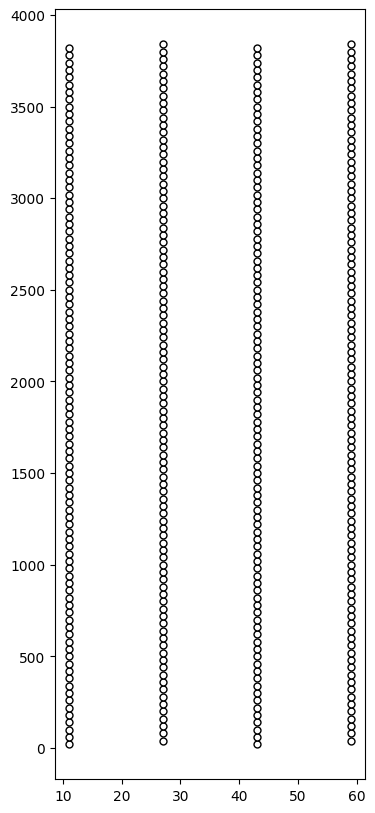

In [3]:
fig, ax = plt.subplots(figsize=(4, 10))
ax.plot(
    locations[:, 0],
    locations[:, 1],
    "o",
    markersize=5,
    markerfacecolor="w",
    color="k",
)

In [4]:
# get traces (multi electrode array signals)
# reshape to have 384 columns (this is exactly the same as doing my_get_traces()custom function)
# mea_sigs = np.memmap(RAW_FILE, dtype="int16", mode="r").reshape(-1, 384)
# mea_sigs.shape

(36451538, 384)

In [23]:
# get recording
Recording = si.read_binary(
    RAW_FILE,
    sampling_frequency=30000,
    num_chan=384,
    dtype="int16",
    file_offset=0,
    time_axis=0,
)
# set channel locations
Recording.set_channel_locations(locations)

In [36]:
channel_ids = Recording.get_channel_ids()
channel_ids

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [35]:
channel_coords = Recording.get_channel_locations()
channel_coords

array([[  43.,   20.],
       [  11.,   20.],
       [  59.,   40.],
       [  27.,   40.],
       [  43.,   60.],
       [  11.,   60.],
       [  59.,   80.],
       [  27.,   80.],
       [  43.,  100.],
       [  11.,  100.],
       [  59.,  120.],
       [  27.,  120.],
       [  43.,  140.],
       [  11.,  140.],
       [  59.,  160.],
       [  27.,  160.],
       [  43.,  180.],
       [  11.,  180.],
       [  59.,  200.],
       [  27.,  200.],
       [  43.,  220.],
       [  11.,  220.],
       [  59.,  240.],
       [  27.,  240.],
       [  43.,  260.],
       [  11.,  260.],
       [  59.,  280.],
       [  27.,  280.],
       [  43.,  300.],
       [  11.,  300.],
       [  59.,  320.],
       [  27.,  320.],
       [  43.,  340.],
       [  11.,  340.],
       [  59.,  360.],
       [  27.,  360.],
       [  43.,  380.],
       [  11.,  380.],
       [  59.,  400.],
       [  27.,  400.],
       [  43.,  420.],
       [  11.,  420.],
       [  59.,  440.],
       [  2

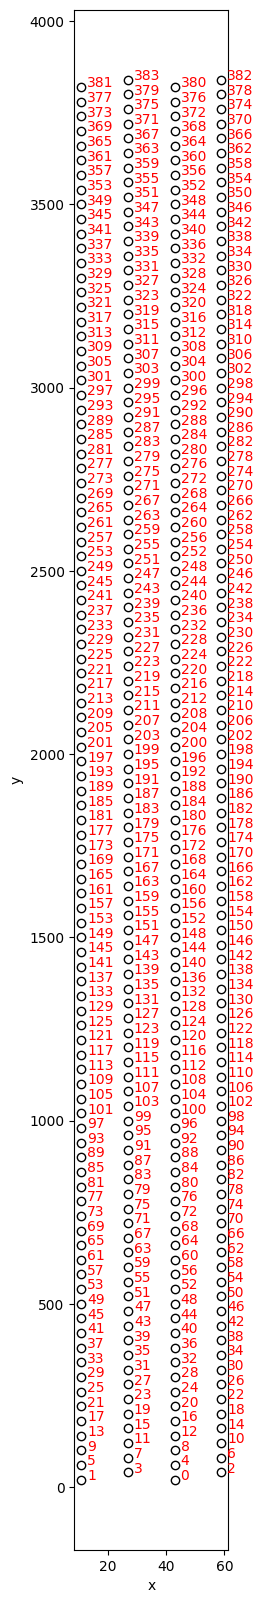

In [37]:
# plot file contact with ids
fig, ax = plt.subplots(1, figsize=(2, 20))
ax.plot(
    channel_coords[:, 0],
    channel_coords[:, 1],
    "o",
    markerfacecolor="w",
    color="k",
)
for ix in range(len(channel_coords)):
    if ix % 1 == 0:
        ax.text(
            channel_coords[ix, 0] + 2,
            channel_coords[ix, 1],
            "%s" % (str(channel_ids[ix])),
            size=10,
            zorder=100,
            color="r",
        )
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_box_aspect(10)

In [39]:
# 8mins
Recording.save(folder=WIRED_PATH, format="binary", n_jobs=4)

write_binary_recording with n_jobs = 1 and chunk_size = None


BinaryFolderRecording: 384 channels - 1 segments - 30.0kHz - 1215.051s